In [9]:
from keras.applications.vgg19 import VGG19
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [10]:
classes = ['Acne and Rosacea Photos',
           'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Eczema Photos',
           'Melanoma Skin Cancer Nevi and Moles',
           'Psoriasis pictures Lichen Planus and related diseases', 
           'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 
           'Nail Fungus and other Nail Disease']

base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))

for layer in base_model.layers[:-5]:
  layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

Found 7644 images belonging to 8 classes.
Found 2016 images belonging to 8 classes.
Epoch 1/20
124/124 [==============================] - 199s 2s/step - loss: 1.9438 - accuracy: 0.2144 - val_loss: 1.7641 - val_accuracy: 0.3065

Epoch 00001: val_loss improved from inf to 1.76414, saving model to vgg19_20epochs.h5
Epoch 2/20
124/124 [==============================] - 199s 2s/step - loss: 1.6833 - accuracy: 0.3368 - val_loss: 1.6026 - val_accuracy: 0.3795

Epoch 00002: val_loss improved from 1.76414 to 1.60255, saving model to vgg19_20epochs.h5
Epoch 3/20
124/124 [==============================] - 208s 2s/step - loss: 1.6005 - accuracy: 0.3874 - val_loss: 1.5611 - val_accuracy: 0.4023

Epoch 00003: val_loss improved from 1.60255 to 1.56113, saving model to vgg19_20epochs.h5
Epoch 4/20
124/124 [==============================] - 184s 1s/step - loss: 1.4980 - accuracy: 0.4283 - val_loss: 1.5973 - val_accuracy: 0.3854

Epoch 00004: val_loss did not improve from 1.56113
Epoch 5/20
124/124 [===

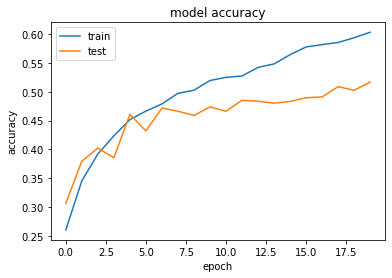

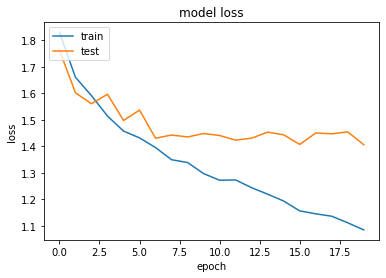

In [11]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('vgg19_20epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 23
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='C:/Users/KIIT/Downloads/NTT AI DATA HACKATHON/Practice/skin dataset/train'
test_path='C:/Users/KIIT/Downloads/NTT AI DATA HACKATHON/Practice/skin dataset/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=62)


# model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
# # model.summary()
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=20,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1920epochs.h5')
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
124/124 [==============================] - 226s 2s/step - loss: 1.0697 - accuracy: 0.6098 - val_loss: 1.4038 - val_accuracy: 0.5278

Epoch 00001: val_loss improved from 1.40661 to 1.40384, saving model to vgg19_20epochs.h5
Epoch 2/10
124/124 [==============================] - 224s 2s/step - loss: 1.0408 - accuracy: 0.6231 - val_loss: 1.4307 - val_accuracy: 0.5020

Epoch 00002: val_loss did not improve from 1.40384
Epoch 3/10
124/124 [==============================] - 228s 2s/step - loss: 1.0221 - accuracy: 0.6243 - val_loss: 1.4295 - val_accuracy: 0.5377

Epoch 00003: val_loss did not improve from 1.40384
Epoch 4/10
124/124 [==============================] - 229s 2s/step - loss: 0.9925 - accuracy: 0.6404 - val_loss: 1.4249 - val_accuracy: 0.5154

Epoch 00004: val_loss did not improve from 1.40384
Epoch 5/10
124/124 [==============================] - 250s 2s/step - loss: 0.9787 - accuracy: 0.6450 - val_loss: 1.3872 - val_accuracy: 0.5223

Epoch 00005: val_loss improved from 1

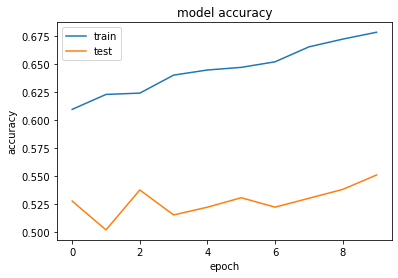

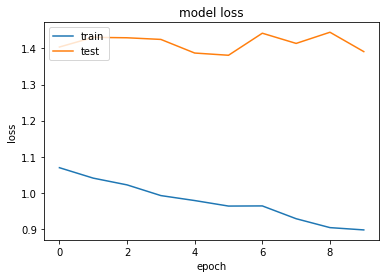

In [12]:
model = load_model('final_vgg1920epochs.h5', compile='True')
history=model.fit(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=10,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1930epochs.h5')
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model = load_model('final_vgg1920epochs.h5', compile=True)

In [14]:
import cv2
img = 'C:/Users/KIIT/Downloads/NTT AI DATA HACKATHON/Practice/skin dataset/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-keratosis-arm-3.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0.01628524 0.02681169 0.31334776 0.01144875 0.2912899  0.11379299
  0.19872822 0.02829547]]


In [16]:
import cv2
img = 'C:/Users/KIIT/Downloads/NTT AI DATA HACKATHON/Practice/skin dataset/test/Acne and Rosacea Photos/07Rhinophyma1.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0.0000000e+00 0.0000000e+00 1.7821271e-24 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [ ]:
import cv2
img = 'test/Psoriasis pictures Lichen Planus and related diseases/08PsoriasisPinking1.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

In [ ]:
import cv2
img = 'test/Nail Fungus and other Nail Disease/habit-tic-deformity-19.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

In [ ]:
import cv2
img = 'test/Tinea Ringworm Candidiasis and other Fungal Infections/tinea-body-109.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction.argmax())

In [ ]:
!cp "final_vgg1920epochs.h5" "C:/Users/KIIT/Downloads/NTT AI DATA HACKATHON/Practice/final_vgg1920epochs.h5"

In [ ]:
!cp "/content/drive/My Drive/SkinDataset/test.zip" "test.zip"